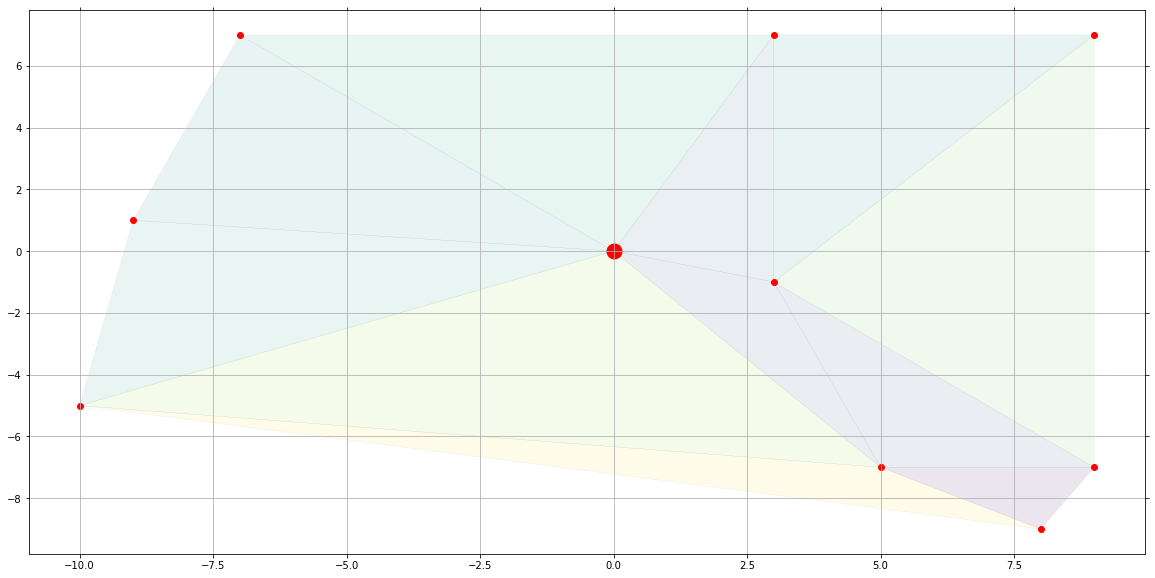

In [56]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt


width = 10
height = 10
pointNumber = 10
points = np.zeros((pointNumber, 2)) 
points[:, 0] = np.random.randint(-width, width, pointNumber) 
points[:, 1] = np.random.randint(-height, height, pointNumber)
points[0,0] = 0
points[0,1] = 0


tri = Delaunay(points)
center = np.sum(points[tri.simplices], axis=1)/3.0 

color = []
for index, sim in enumerate(points[tri.simplices]):
    cx, cy = center[index][0], center[index][1]
    x1, y1 = sim[0][0], sim[0][1]
    x2, y2 = sim[1][0], sim[1][1]
    x3, y3 = sim[2][0], sim[2][1]
    
    s = ((x1-cx)**2+(y1-cy)**2)**0.5 + ((cx-x3)**2+(cy-y3)**2)**0.5 + ((cx-x2)**2+(cy-y2)**2)**0.5
    color.append(s)
color = np.array(color) / np.max(color)
color_sz = len(color)

plt.figure(figsize=(20, 10)) 
plt.tripcolor(points[:, 0], points[:, 1], tri.simplices.copy(), facecolors=color, edgecolors='k',alpha=0.1) 

plt.tick_params(labelbottom='off', labelleft='off', left='off', right='off', bottom='off', top='off') 
ax = plt.gca() 
plt.scatter(points[:,0],points[:,1], color='r')
plt.scatter(points[0,0],points[0,1], color='r', linewidths= 10)

plt.grid()
#plt.savefig('Delaunay.png', transparent=True, dpi=600)